In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [2]:
sns.set(font_scale=1.5)

In [3]:
df = pd.read_csv('housing_clean.csv')

In [4]:
df.head()

,index,sub_area,n_bhk,surface,price,company,township,club,school,hospital,mall,park,pool,gym
0,1,Bavdhan,1.0,492.0,3.9,Shapoorji Paloonji,Vanaha,yes,yes,yes,yes,yes,yes,yes
1,2,Bavdhan,2.0,774.0,6.5,Shapoorji Paloonji,Vanaha,yes,yes,yes,yes,yes,yes,yes
2,3,Bavdhan,3.0,889.0,7.4,Shapoorji Paloonji,Vanaha,yes,yes,yes,yes,yes,yes,yes
3,4,Bavdhan,3.0,1018.0,8.9,Shapoorji Paloonji,Vanaha,yes,yes,yes,yes,yes,yes,yes
4,5,Mahalunge,2.0,743.0,7.4,Godrej Properties,Godrej Hills retreat,yes,yes,yes,yes,yes,yes,yes


In [5]:
df['company'].unique(), df['township'].unique()

(array(['Shapoorji Paloonji', 'Godrej Properties', 'ANP CORP',
        'Urban Space Creator', 'VTP Reality', 'Waghvani Constructions',
        'Sukwani Associates', 'Mantra Properties', 'ravima ventures ',
        'proviso group', 'unique properties', 'sagitarius ecospaces llp',
        'nirman developers', 'jhala group', 'shroff developers ',
        'kundan Spaces', 'venkatesh bhoomi construction', 'Lush Life',
        'maha anand Pinnac associates ', 'vasupujya corporation',
        'ace constructions ', 'Wellwisher Apartments ', 'Dolphin Group ',
        'Oxy Buildcorp', 'kohinoor group', 'Bhaktamar Realities ',
        'Porwal & Anand Develkoper', 'Porwal  Develkoper',
        'keystone landmark ', 'Puraniks', 'majestique landmarks ',
        'Kalpataru', 'Vijaya Laxmi Creations',
        'vijaya Laxmi infrarealtors', 'Calyx Spaces', 'SUPREME',
        'Tejraaj Group'], dtype=object),
 array(['Vanaha ', 'Godrej Hills retreat', 'ANP Universe', 'Urban Skyline',
        'VTP Cierra',

In [6]:
df = df.drop(columns=['index', 'company', 'township']).drop_duplicates()

In [7]:
binary_cols = df.iloc[:, 4:].columns.tolist()
binary_cols

['club', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [8]:
df[['price', 'pool']].groupby('pool').price.mean()

pool
no      6.470113
yes    10.039575
Name: price, dtype: float64

In [9]:
lab_encoder = LabelEncoder()

for col in binary_cols:
    df[col] = lab_encoder.fit_transform(df[col])

In [10]:
df

,sub_area,n_bhk,surface,price,club,school,hospital,mall,park,pool,gym
0,Bavdhan,1.0,492.0,3.900,1,1,1,1,1,1,1
1,Bavdhan,2.0,774.0,6.500,1,1,1,1,1,1,1
2,Bavdhan,3.0,889.0,7.400,1,1,1,1,1,1,1
3,Bavdhan,3.0,1018.0,8.900,1,1,1,1,1,1,1
4,Mahalunge,2.0,743.0,7.400,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
187,BANER,3.0,1350.0,16.000,1,0,0,0,1,1,1
188,BANER,4.0,1600.0,23.000,1,0,0,0,1,1,1
189,BANER,2.0,789.0,9.500,0,0,0,0,1,1,1
190,BANER,3.0,1107.0,13.500,0,0,0,0,1,1,1


In [11]:
df_sa_count = df.groupby('sub_area')['price'].count().reset_index().rename(columns = {'price': 'counts'}).sort_values('counts', ascending=False).reset_index(drop=True)

df_sa_count['sa_contribution'] = df_sa_count['counts']/len(df)

df_sa_count

,sub_area,counts,sa_contribution
0,Kharadi,16,0.083333
1,BT Kawade RD,10,0.052083
2,handewadi,10,0.052083
3,wadgaon sheri,9,0.046875
4,Hinjewadi,9,0.046875
5,Ravet,9,0.046875
6,NIBM,8,0.041667
7,hadapsar,8,0.041667
8,BANER,7,0.036458
9,vimannagar,6,0.031250


<AxesSubplot:xlabel='counts', ylabel='sub_area'>

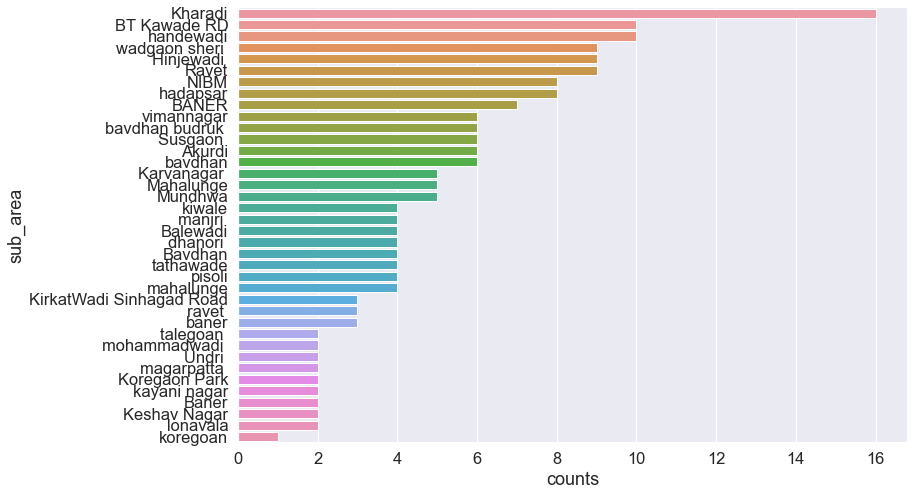

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_sa_count, x='counts', y='sub_area', ax=ax)

In [13]:
len(df_sa_count), np.mean(df_sa_count['counts'])

(38, 5.026315789473684)

<AxesSubplot:xlabel='surface', ylabel='price'>

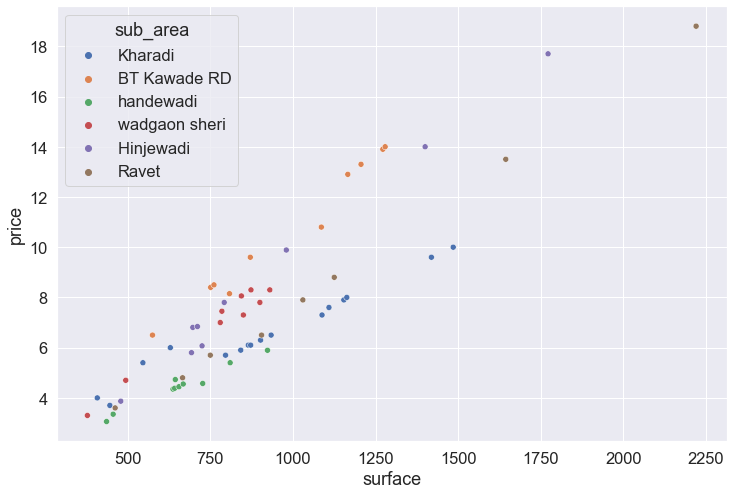

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

df_plot = df_sa_count.merge(df[['sub_area', 'surface', 'price']], on='sub_area')
df_plot = df_plot[df_plot['counts'] > 8]

sns.scatterplot(data=df_plot, x='surface', y='price', hue='sub_area')

In [28]:
sa_feat = df_sa_count.loc[df_sa_count['counts']>8, "sub_area"].tolist()
df['sub_area'] = df['sub_area'].where(df['sub_area'].isin(sa_feat), "other")
df['sub_area'].unique()

array(['other', 'Ravet', 'Kharadi', 'handewadi', 'BT Kawade RD',
       'Hinjewadi ', 'wadgaon sheri '], dtype=object)

In [23]:
sa_feat

['Kharadi',
 'BT Kawade RD',
 'handewadi',
 'wadgaon sheri ',
 'Hinjewadi ',
 'Ravet']